In [1]:
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import nltk

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avisi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv("train.tsv", sep="\t")

In [5]:
df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


Here are couple of instances where punctuations appeared to be predictive. So if we "cleanedup" the data in the name of data preparation some predictiveness will be lost.

In [6]:
example = df[(df['PhraseId'] >= 0) & (df['PhraseId'] <= 2)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .  - Sentiment: 1

A series of escapades demonstrating the adage that what is good for the goose  - Sentiment: 2


In [12]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [13]:

def TextPreprocessing(text):
    text=str(text)
    text = text.replace("'","")
    tokenized_train_data = text_to_word_sequence(text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=" ")
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_data if not i in stop_words]
    stopwordremove_text = ' '.join(stopwordremove)
    numberRemove = ''.join(num for num in stopwordremove_text if not num.isdigit())
    stemmer = PorterStemmer()
    stem_input = nltk.word_tokenize(numberRemove)
    stem_text = ' '.join([stemmer.stem(word) for word in stem_input])
    return stem_text

In [14]:
from keras.preprocessing.text import text_to_word_sequence
df['Phrase'] = df['Phrase'].apply(TextPreprocessing)

Creating the TF - IDF vectorizer

In [16]:
from nltk import word_tokenize
def tokenizer(x):
    return ( w for w in word_tokenize(x) if len(w) >3)
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(df['Phrase'].values)
#full_text

vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(df['Phrase'])


In [17]:
print("Train set dimensions after applying TF-IDF vectorizer:")
np.shape(train_vectorized)

Train set dimensions after applying TF-IDF vectorizer:


(156060, 138704)

Regression Models:
1)LogisticRegression
CART Models:
1)DecisionTreeClassifier
2)ExtraTreeClassifier
Bagging Trees:
1)ExtraTreesClassifier
2)RandomForestClassifier
SVM Models:
1)LinearSVC
Naive Bayes Models:
1)BernoulliNB
2)MultinomialNB
Boosting Trees:
1)Adaboost Classifier
2)Extreme Gradient Boosting, XGBoost
Lazy Classifiers:
1)KNeighborsClassifier

In [18]:
X = train_vectorized
y = df.Sentiment.values


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import time

# create a stratified split of the data and a 80/20 split.
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [19]:
ml_default_performance_metrics_df = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['LogisticRegression', 'DecisionTreeClassifier', 'ExtraTreeClassifier', 'ExtraTreesClassifier', 'RandomForestClassifier', 'LinearSVC', 'BernoulliNB', 'MultinomialNB', 'AdaboostClassifier', 'XGB', 'KNeighborsClassifier'])

# Multinomial Logistic Regression

              precision    recall  f1-score   support

           0       0.63      0.15      0.24      1414
           1       0.56      0.31      0.40      5455
           2       0.64      0.90      0.75     15917
           3       0.59      0.43      0.50      6585
           4       0.67      0.19      0.29      1841

    accuracy                           0.62     31212
   macro avg       0.62      0.40      0.44     31212
weighted avg       0.62      0.62      0.58     31212


accuracy_score 0.6235101883890811

Weighted Averaged validation metrics
precision_score 0.6159207462317198
recall_score 0.6235101883890811
f1_score 0.5845750927043281


elapsed time in seconds:  5.0766072273254395



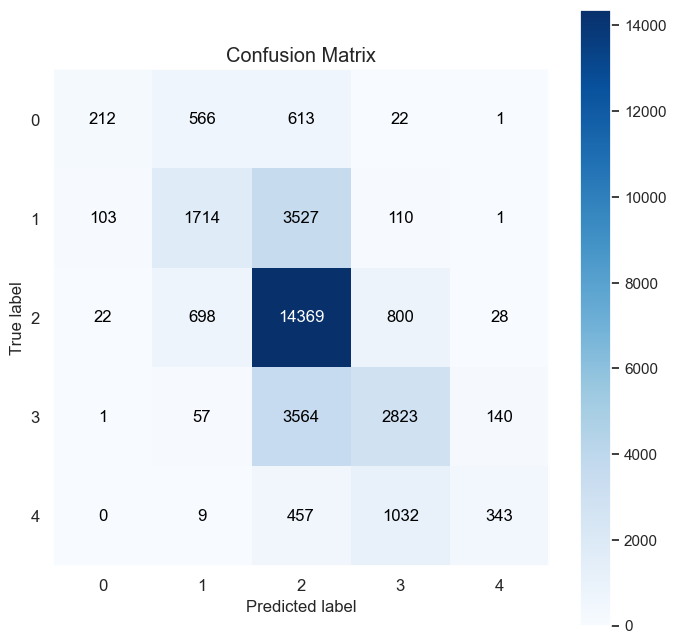

In [20]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

clf_logistic_regression = LogisticRegression(multi_class='ovr', solver='sag', random_state=42)
clf_logistic_regression.fit(xtrain, ytrain)
predictions = clf_logistic_regression.predict(xvalid)

print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


ml_default_performance_metrics_df.loc['LogisticRegression']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['LogisticRegression']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['LogisticRegression']['F1-score'] = f1_score(yvalid, predictions, average='micro')


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

# DecisionTreeClassifier


Evaluation of DecisionTreeClassifier, with train-test split:
              precision    recall  f1-score   support

           0       0.41      0.43      0.42      1414
           1       0.50      0.50      0.50      5455
           2       0.72      0.77      0.74     15917
           3       0.54      0.49      0.51      6585
           4       0.49      0.35      0.41      1841

    accuracy                           0.62     31212
   macro avg       0.53      0.51      0.52     31212
weighted avg       0.62      0.62      0.62     31212


accuracy_score 0.622645136485967

Weighted Averaged validation metrics
precision_score 0.6166216883206052
recall_score 0.622645136485967
f1_score 0.6184129604024527


elapsed time in seconds:  361.86485266685486



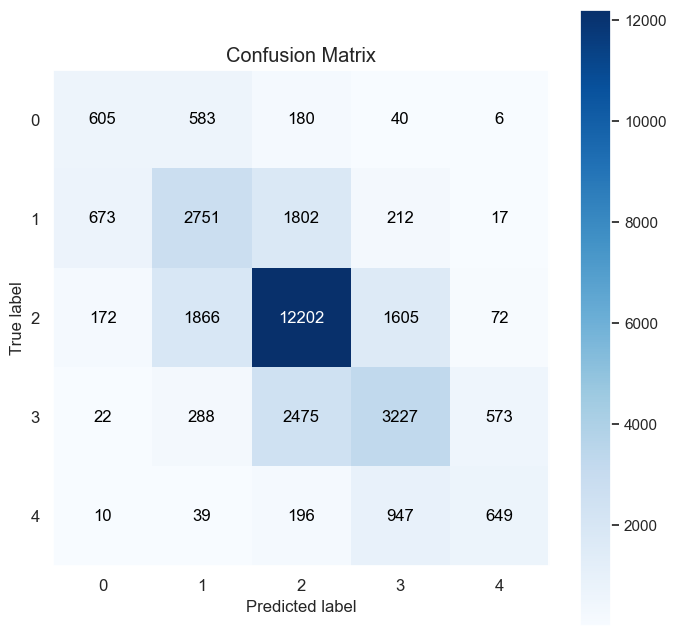

In [21]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
    
print()
print("Evaluation of DecisionTreeClassifier, with train-test split:")

clf_DecisionTreeClassifier = DecisionTreeClassifier(random_state=42)
clf_DecisionTreeClassifier.fit(xtrain, ytrain)
predictions = clf_DecisionTreeClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

# ExtraTreeClassifier


Evaluation of ExtraTreeClassifier with train-test split:
              precision    recall  f1-score   support

           0       0.40      0.44      0.41      1414
           1       0.50      0.50      0.50      5455
           2       0.72      0.77      0.74     15917
           3       0.54      0.48      0.51      6585
           4       0.49      0.36      0.41      1841

    accuracy                           0.62     31212
   macro avg       0.53      0.51      0.52     31212
weighted avg       0.61      0.62      0.62     31212


accuracy_score 0.6212674612328591

Weighted Averaged validation metrics
precision_score 0.614788434543404
recall_score 0.6212674612328591
f1_score 0.6165704364231691


elapsed time in seconds:  548.0321745872498



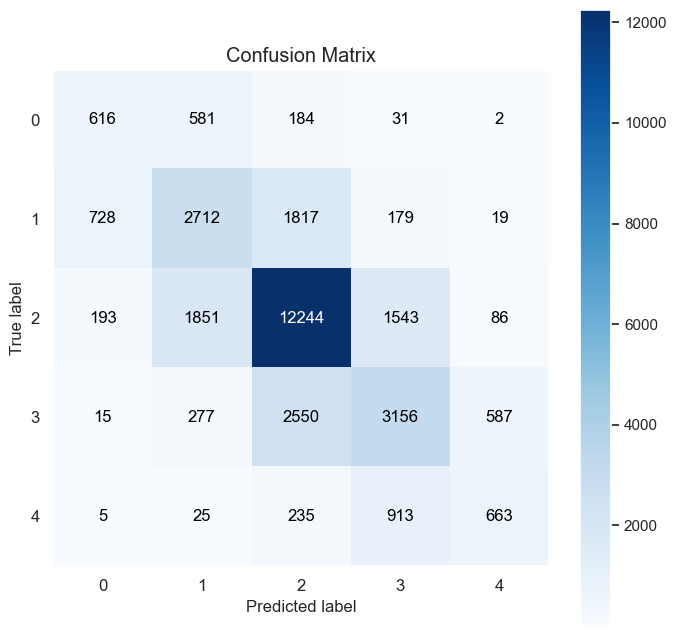

In [22]:
from sklearn.tree import ExtraTreeClassifier

start_time = time.time()
    
print()
print("Evaluation of ExtraTreeClassifier with train-test split:")

clf_ExtraTreeClassifier = ExtraTreeClassifier(random_state=42)
clf_ExtraTreeClassifier.fit(xtrain, ytrain)
predictions = clf_ExtraTreeClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

ml_default_performance_metrics_df.loc['ExtraTreeClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['ExtraTreeClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['ExtraTreeClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

# RandomForestClassifier


Evaluation of RandomForestClassifier with train-test split:
              precision    recall  f1-score   support

           0       0.45      0.38      0.41      1414
           1       0.53      0.48      0.50      5455
           2       0.72      0.80      0.76     15917
           3       0.55      0.50      0.52      6585
           4       0.50      0.40      0.45      1841

    accuracy                           0.64     31212
   macro avg       0.55      0.51      0.53     31212
weighted avg       0.63      0.64      0.63     31212


accuracy_score 0.6361976163014226

Weighted Averaged validation metrics
precision_score 0.6250259233881562
recall_score 0.6361976163014226
f1_score 0.6285002409048263


elapsed time in seconds:  3138.8327951431274



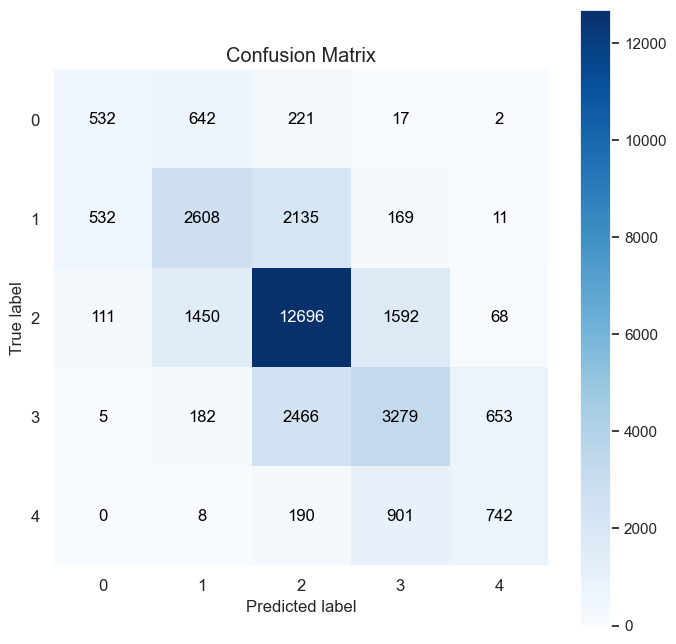

In [23]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
    
print()
print("Evaluation of RandomForestClassifier with train-test split:")

clf_RandomForestClassifier = RandomForestClassifier(n_estimators = 10, random_state=42)
clf_RandomForestClassifier.fit(xtrain, ytrain)
predictions = clf_RandomForestClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['RandomForestClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['RandomForestClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['RandomForestClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

# LinearSVC


Evaluation of LinearSVC, multi_class='ovr', with train-test split:
              precision    recall  f1-score   support

           0       0.49      0.37      0.42      1414
           1       0.55      0.51      0.53      5455
           2       0.72      0.81      0.76     15917
           3       0.57      0.52      0.55      6585
           4       0.54      0.40      0.46      1841

    accuracy                           0.65     31212
   macro avg       0.58      0.52      0.54     31212
weighted avg       0.64      0.65      0.64     31212


accuracy_score 0.6519607843137255

Weighted Averaged validation metrics
precision_score 0.6410601544070963
recall_score 0.6519607843137255
f1_score 0.6438341083467891


elapsed time in seconds:  5.878341913223267



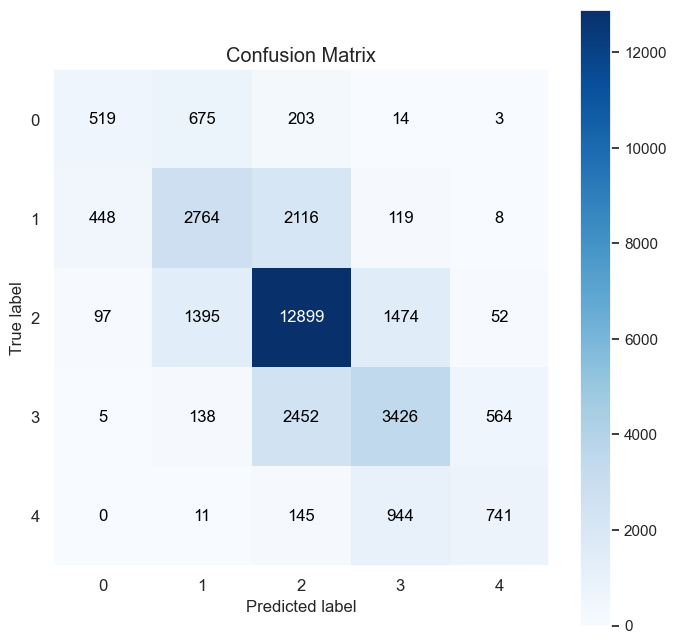

In [24]:
from sklearn.svm import LinearSVC

start_time = time.time()
    
print()
print("Evaluation of LinearSVC, multi_class='ovr', with train-test split:")

clf_LinearSVC = LinearSVC(multi_class='ovr', random_state=42)
clf_LinearSVC.fit(xtrain, ytrain)
predictions = clf_LinearSVC.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['LinearSVC']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['LinearSVC']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['LinearSVC']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

# BernoulliNB and MultinomialNB


Evaluation of BernoulliNB with train-test split:
              precision    recall  f1-score   support

           0       0.44      0.20      0.28      1414
           1       0.53      0.34      0.41      5455
           2       0.63      0.87      0.73     15917
           3       0.56      0.35      0.43      6585
           4       0.47      0.24      0.32      1841

    accuracy                           0.60     31212
   macro avg       0.53      0.40      0.43     31212
weighted avg       0.58      0.60      0.57     31212


accuracy_score 0.6013071895424836

Weighted Averaged validation metrics
precision_score 0.5799748536041698
recall_score 0.6013071895424836
f1_score 0.5679086622284462


elapsed time in seconds:  0.2034282684326172



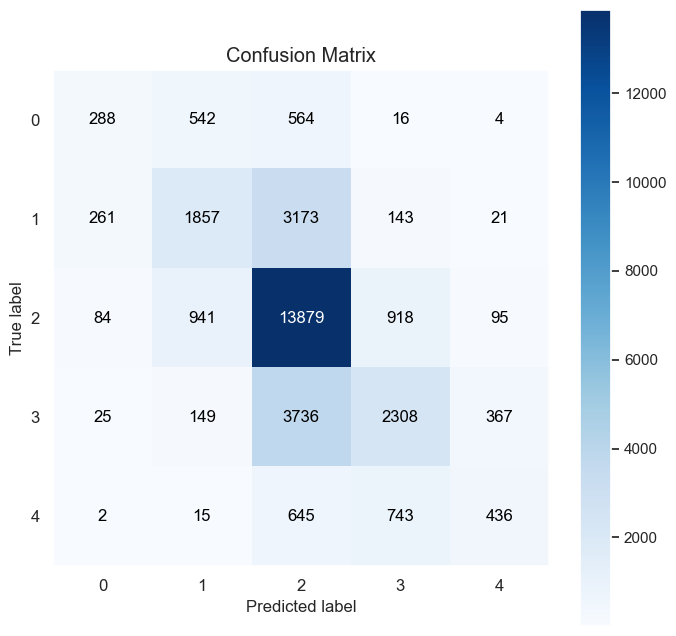

In [25]:
from sklearn.naive_bayes import BernoulliNB

start_time = time.time()
    
print()
print("Evaluation of BernoulliNB with train-test split:")

clf_BernoulliNB = BernoulliNB()
clf_BernoulliNB.fit(xtrain, ytrain)
predictions = clf_BernoulliNB.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['BernoulliNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['BernoulliNB']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['BernoulliNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()


Evaluation of MultinomialNB with train-test split:
              precision    recall  f1-score   support

           0       0.66      0.06      0.10      1414
           1       0.57      0.29      0.38      5455
           2       0.62      0.92      0.74     15917
           3       0.58      0.40      0.48      6585
           4       0.77      0.08      0.15      1841

    accuracy                           0.61     31212
   macro avg       0.64      0.35      0.37     31212
weighted avg       0.62      0.61      0.56     31212


accuracy_score 0.613514033064206

Weighted Averaged validation metrics
precision_score 0.6154810351353689
recall_score 0.613514033064206
f1_score 0.5598488799871678


elapsed time in seconds:  0.17040753364562988



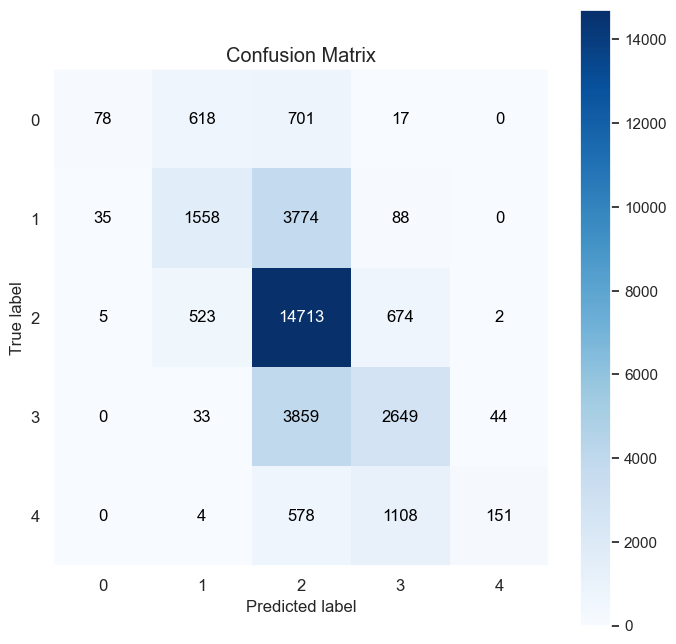

In [26]:
from sklearn.naive_bayes import MultinomialNB

start_time = time.time()
    
print()
print("Evaluation of MultinomialNB with train-test split:")

clf_MultinomialNB = MultinomialNB()
clf_MultinomialNB.fit(xtrain, ytrain)
predictions = clf_MultinomialNB.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['MultinomialNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['MultinomialNB']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['MultinomialNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

# AdaBoostClassifier


Evaluation of Adaboost with train-test split:
              precision    recall  f1-score   support

           0       0.48      0.08      0.14      1414
           1       0.44      0.06      0.11      5455
           2       0.56      0.95      0.70     15917
           3       0.42      0.18      0.25      6585
           4       0.49      0.12      0.19      1841

    accuracy                           0.54     31212
   macro avg       0.48      0.28      0.28     31212
weighted avg       0.50      0.54      0.45     31212


accuracy score 0.5420351146994745

Weighted Averaged validation metrics
precision_score 0.5016161311314681
recall_score 0.5420351146994745
f1_score 0.4487371542705417


elapsed time in seconds:  207.423437833786



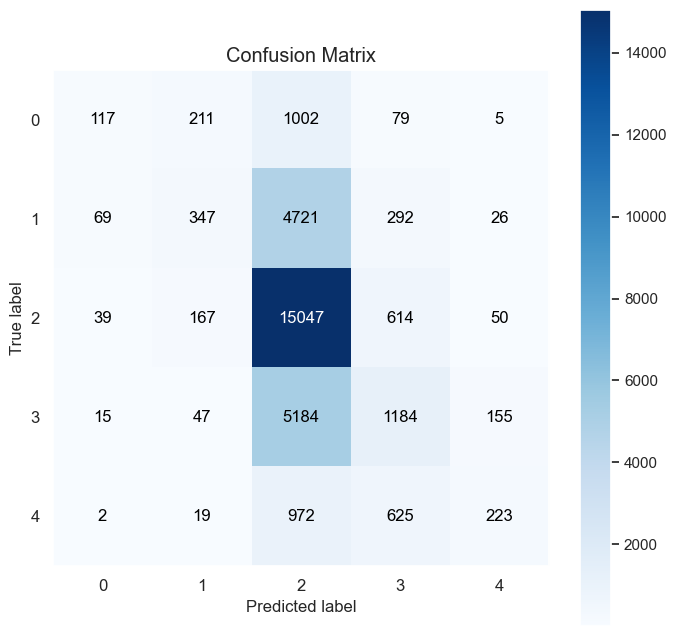

In [27]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
    
print()
print("Evaluation of Adaboost with train-test split:")

clf_adaboost = AdaBoostClassifier(random_state=42)
clf_adaboost.fit(xtrain, ytrain)
predictions = clf_adaboost.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['AdaboostClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['AdaboostClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['AdaboostClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


### storing performance results:


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

# Extreme Gradient Boosting XGBoost

              precision    recall  f1-score   support

           0       0.59      0.14      0.23      1414
           1       0.53      0.15      0.24      5455
           2       0.59      0.95      0.72     15917
           3       0.53      0.25      0.34      6585
           4       0.62      0.20      0.30      1841

    accuracy                           0.58     31212
   macro avg       0.57      0.34      0.37     31212
weighted avg       0.57      0.58      0.51     31212


accuracy_score 0.5789119569396386

Weighted Averaged validation metrics
precision_score 0.5660724659805098
recall_score 0.5789119569396386
f1_score 0.5097270108728558


elapsed time in seconds:  20.92865538597107



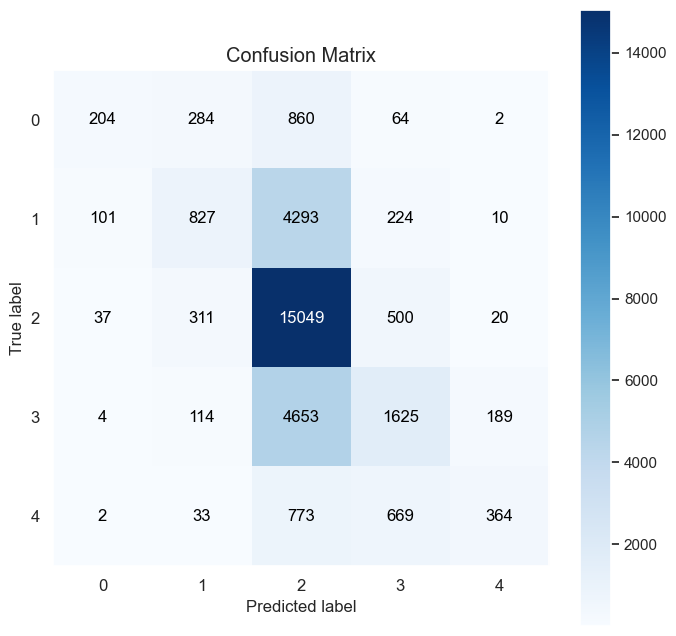

In [28]:
import xgboost as xgb

start_time = time.time()

clf_xgb = xgb.XGBClassifier(objective = 'multi:softmax', seed=42)
clf_xgb.fit(xtrain, ytrain)
predictions = clf_xgb.predict(xvalid)

print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['XGB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['XGB']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['XGB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

# KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.43      0.36      0.39      1414
           1       0.51      0.44      0.47      5455
           2       0.66      0.82      0.74     15917
           3       0.56      0.40      0.47      6585
           4       0.57      0.27      0.37      1841

    accuracy                           0.61     31212
   macro avg       0.55      0.46      0.49     31212
weighted avg       0.60      0.61      0.60     31212


accuracy_score 0.6132577213892093

Weighted Averaged validation metrics
precision_score 0.5987464963230615
recall_score 0.6132577213892093
f1_score 0.5951428531192403


elapsed time in seconds:  33.213847637176514



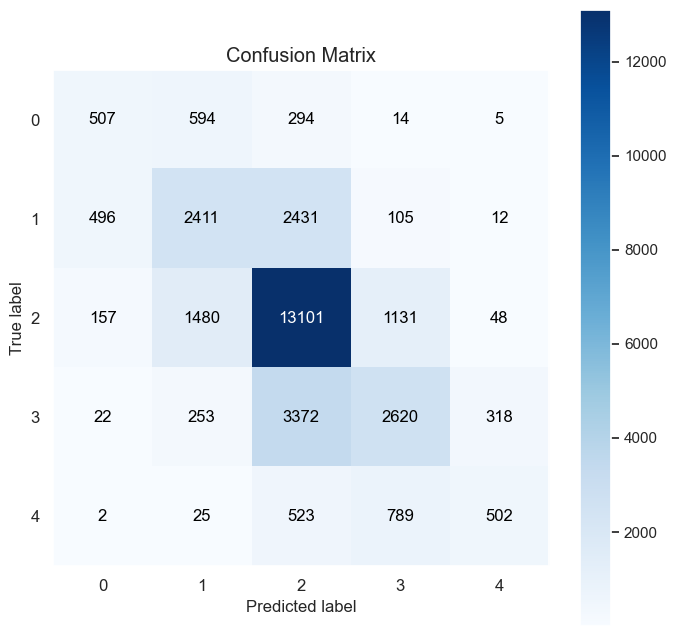

In [29]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

clf_knn = KNeighborsClassifier()
clf_knn.fit(xtrain, ytrain)
predictions = clf_knn.predict(xvalid)

print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['KNeighborsClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['KNeighborsClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['KNeighborsClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

# Summarizing ML Classifiers based on their accuracy with TF - IDF as Feature Extraction

In [30]:
ml_default_performance_metrics_df.sort_values(by="accuracy", ascending=False)

,accuracy,F1-score,training-time
LinearSVC,0.651961,0.643834,5.192361
RandomForestClassifier,0.636198,0.6285,3138.771837
LogisticRegression,0.62351,0.62351,5.062071
DecisionTreeClassifier,0.622645,0.618413,361.854837
ExtraTreeClassifier,0.621267,0.61657,548.024399
MultinomialNB,0.613514,0.559849,0.109553
KNeighborsClassifier,0.613258,0.595143,33.162164
BernoulliNB,0.601307,0.567909,0.145285
XGB,0.578912,0.509727,20.874729
AdaboostClassifier,0.542035,0.448737,207.368113


<Axes: >

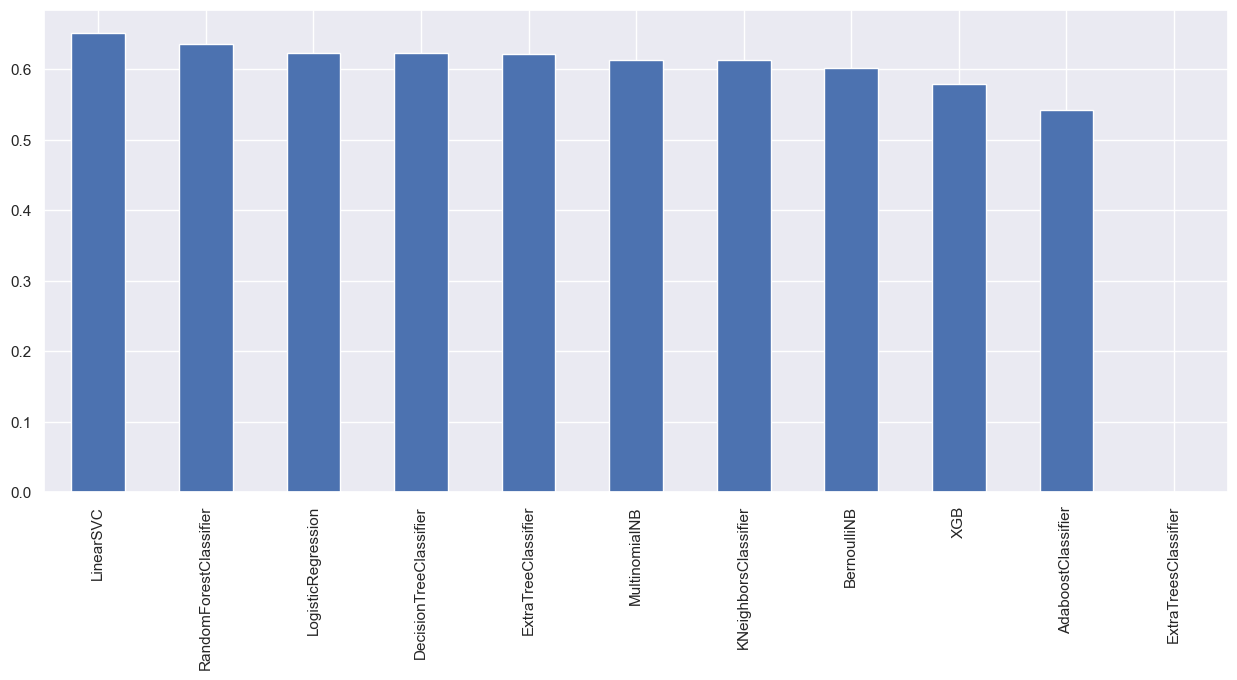

In [31]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
ml_default_performance_metrics_df.sort_values(by="accuracy", ascending=False).accuracy.plot(kind="bar")

In [32]:
ml_default_performance_metrics_df.sort_values(by="F1-score", ascending=True)

,accuracy,F1-score,training-time
AdaboostClassifier,0.542035,0.448737,207.368113
XGB,0.578912,0.509727,20.874729
MultinomialNB,0.613514,0.559849,0.109553
BernoulliNB,0.601307,0.567909,0.145285
KNeighborsClassifier,0.613258,0.595143,33.162164
ExtraTreeClassifier,0.621267,0.61657,548.024399
DecisionTreeClassifier,0.622645,0.618413,361.854837
LogisticRegression,0.62351,0.62351,5.062071
RandomForestClassifier,0.636198,0.6285,3138.771837
LinearSVC,0.651961,0.643834,5.192361


<Axes: >

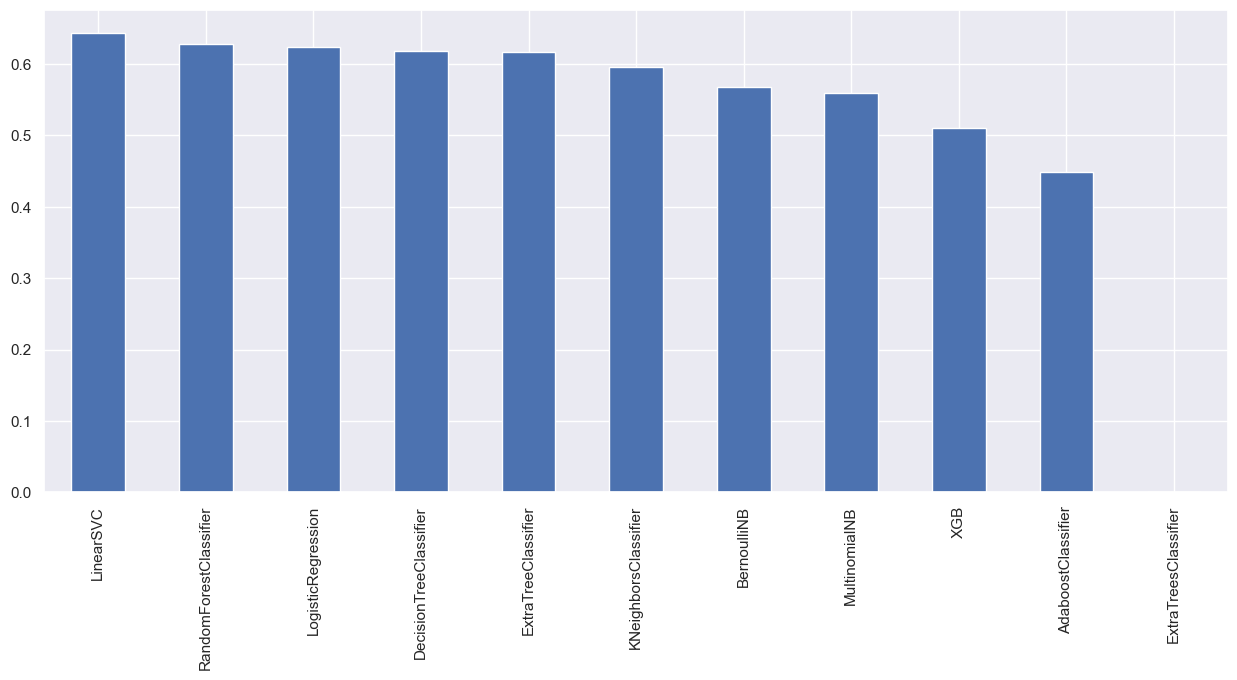

In [33]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
ml_default_performance_metrics_df.sort_values(by="F1-score", ascending=False)["F1-score"].plot(kind="bar")

# Summarizing ML Classifiers based on their training fitting time with TF - IDF as Feature Extraction

In [34]:
ml_default_performance_metrics_df.sort_values(by="training-time", ascending=True)

,accuracy,F1-score,training-time
MultinomialNB,0.613514,0.559849,0.109553
BernoulliNB,0.601307,0.567909,0.145285
LogisticRegression,0.62351,0.62351,5.062071
LinearSVC,0.651961,0.643834,5.192361
XGB,0.578912,0.509727,20.874729
KNeighborsClassifier,0.613258,0.595143,33.162164
AdaboostClassifier,0.542035,0.448737,207.368113
DecisionTreeClassifier,0.622645,0.618413,361.854837
ExtraTreeClassifier,0.621267,0.61657,548.024399
RandomForestClassifier,0.636198,0.6285,3138.771837


<Axes: >

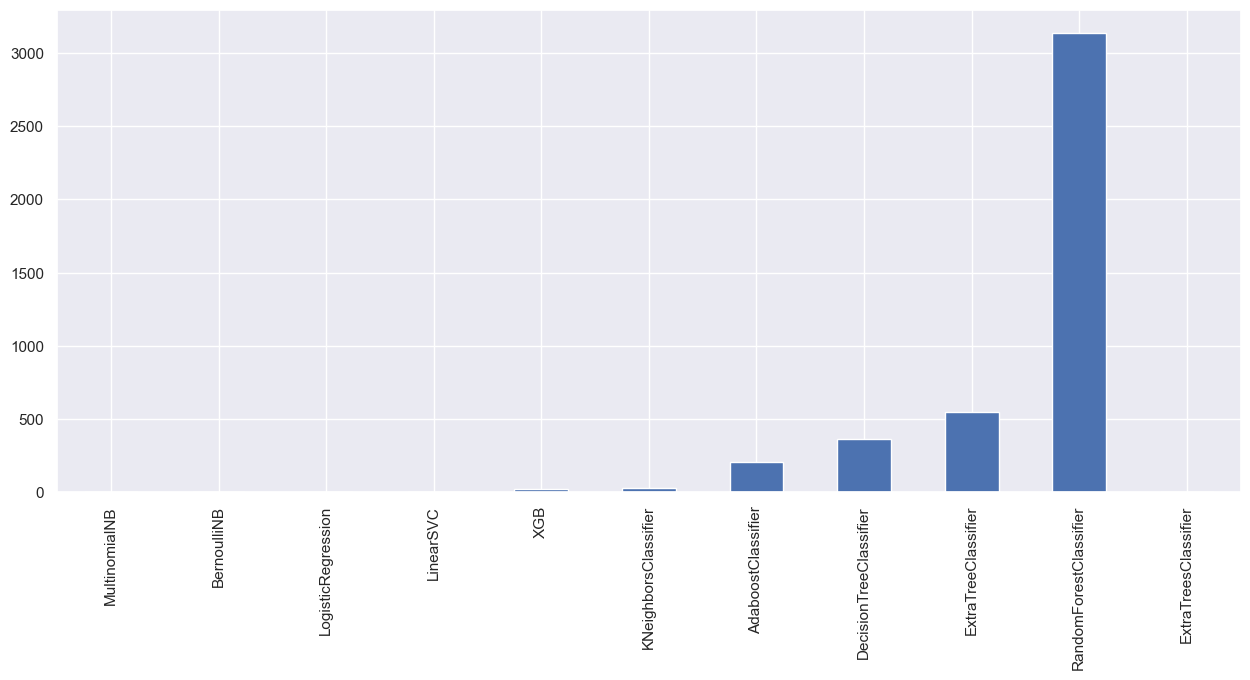

In [35]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
ml_default_performance_metrics_df.sort_values(by="training-time", ascending=True)["training-time"].plot(kind="bar")

# Ensemble Top 4 Models 

              precision    recall  f1-score   support

           0       0.46      0.40      0.43      1414
           1       0.54      0.51      0.52      5455
           2       0.71      0.82      0.76     15917
           3       0.58      0.48      0.52      6585
           4       0.56      0.34      0.43      1841

    accuracy                           0.65     31212
   macro avg       0.57      0.51      0.53     31212
weighted avg       0.63      0.65      0.64     31212


accuracy_score 0.6459694989106753

Weighted Averaged validation metrics
precision_score 0.6344875072106612
recall_score 0.6459694989106753
f1_score 0.6355466969222441



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

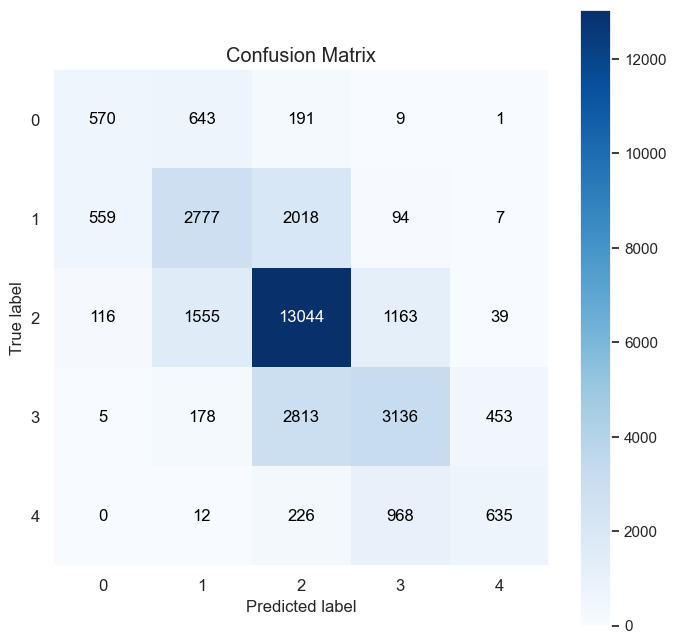

In [36]:
predictions_linear_svc = clf_LinearSVC.predict(xvalid)
predictions_extra_trees = clf_ExtraTreeClassifier.predict(xvalid)
predictions_logistic_regression = clf_logistic_regression.predict(xvalid)
predictions_random_forest = clf_RandomForestClassifier.predict(xvalid)

ensemble_all_ml_default_pred_df = pd.DataFrame({
    'linear_svc':predictions_linear_svc,
    'logistic_regression':predictions_logistic_regression,
    'extra_trees':predictions_extra_trees,
    'random_forest':predictions_random_forest})


# ensemble classes' predictions over the validation set
pred_mode = ensemble_all_ml_default_pred_df.agg('mode',axis=1)[0].values

print(classification_report(yvalid, pred_mode))

print()
print("accuracy_score", accuracy_score(yvalid, pred_mode))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, pred_mode, average='weighted'))
print("recall_score", recall_score(yvalid, pred_mode, average='weighted'))
print("f1_score", f1_score(yvalid, pred_mode, average='weighted'))


print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, pred_mode)

# Applying the Ensemble on scraped data

In [37]:
test= pd.read_csv("imdb_scraped_data.csv")

In [38]:
test.head()

,Review_Date,Author,Rating,Review_Title,Review,Review_Url
0,17-Feb-23,cardsrock,6.0,A mixed bag\n,After most entries in Phase 4 passed by withou...,/review/rw8875586/?ref_=tt_urv
1,17-Feb-23,poseyfan,7.0,The Marvel Studios conveyor belt of quantity ...,"Well, I'll start off by saying that this wasn'...",/review/rw8875586/?ref_=tt_urv
2,17-Feb-23,Top_Dawg_Critic,6.0,I'm pretty sure this was written by fifth-gra...,"As a huge fan of the first one, and almost as ...",/review/rw8875586/?ref_=tt_urv
3,19-Feb-23,oszajcakk,6.0,Another one\n,"New Ant-Man is not a bad movie, but it's repea...",/review/rw8875586/?ref_=tt_urv
4,17-Feb-23,FeastMode,6.0,A bit unfocussed\n,I enjoyed watching Quantumania. It's a mostly ...,/review/rw8875586/?ref_=tt_urv


In [39]:
test=test.drop('Rating', axis=1)
test=test.drop('Review_Date', axis=1)
test=test.drop('Author', axis=1)
test=test.drop('Review_Title', axis=1)
test=test.drop('Review_Url', axis=1)

In [40]:
test.head()

,Review
0,After most entries in Phase 4 passed by withou...
1,"Well, I'll start off by saying that this wasn'..."
2,"As a huge fan of the first one, and almost as ..."
3,"New Ant-Man is not a bad movie, but it's repea..."
4,I enjoyed watching Quantumania. It's a mostly ...


In [41]:
test['Review'].isnull().sum()

5

In [42]:
test = test.dropna()

In [47]:
test['Review'] = test['Review'].apply(TextPreprocessing)

In [48]:

test_vectorized = vectorizer.transform(test['Review'])


In [49]:
predictions_linear_svc_test = clf_LinearSVC.predict(test_vectorized)
predictions_extra_trees_test = clf_ExtraTreeClassifier.predict(test_vectorized)
predictions_logistic_regression_test = clf_logistic_regression.predict(test_vectorized)
predictions_random_forest_test = clf_RandomForestClassifier.predict(test_vectorized)

ensemble_all_ml_default_pred_df_test = pd.DataFrame({
    'linear_svc':predictions_linear_svc_test,
    'logistic_regression':predictions_logistic_regression_test,
    'extra_trees':predictions_extra_trees_test,
    'random_forest':predictions_random_forest_test})


# ensemble classes' predictions over the validation set
pred_mode = ensemble_all_ml_default_pred_df_test.agg('mode',axis=1)[0].values


In [50]:
pred_mode

array([1., 2., 3., ..., 3., 2., 3.])